In [81]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

### 2. Measure positions and distances on a plane with a single camera

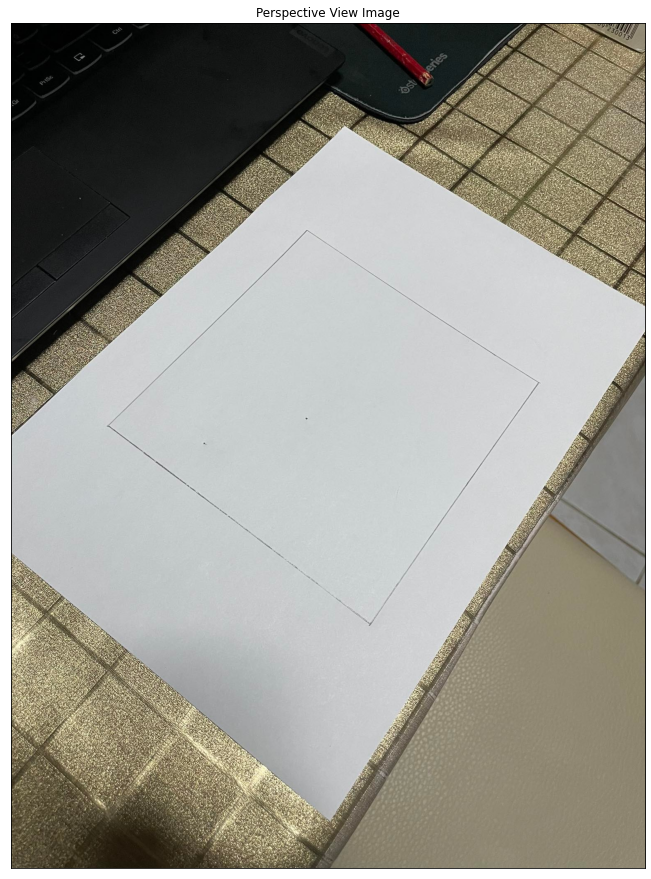

In [82]:
# Load Image
pers_image = cv.imread('ex2-images/view1.jpg')
pers_image = cv.cvtColor(pers_image, cv.COLOR_BGR2RGB)  # convert from BGR to RGB

# Show Image
plt.figure(figsize=(25,25))
plt.subplot(122),plt.imshow(pers_image)
plt.title('Perspective View Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [83]:
pers_points = []

# Mouse callback function
def mouse_handle(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        # Add the selected point to the list
        pers_points.append((x, y))
        # Draw a red small circle at the selected point
        cv.circle(pers_image, (x, y), 3, (0, 0, 255), -1)

#### Select points on the image manually

In [84]:
# Create a window to display the image and set the mouse callback function
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.resizeWindow('Image', 1920, 1080)

cv.setMouseCallback('Image', mouse_handle)

# Display the image until the user presses a key
while True:
    cv.imshow('Image', pers_image)
    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        cv.destroyAllWindows()
        break

#### Create list of points with real coordinates which are the corresponding points in the image

In [85]:
# Create a list of points to be transformed
points = np.array([[0,0], [20,40], [60,70], [150,0], [150, 150], [0, 150]], dtype=np.float32)

# Compute the homography matrix
H, _ = cv.findHomography(np.array(pers_points), points, cv.RANSAC, 5.0)

# Print the resulting homography matrix
print("Homography Matrix:\n", H)


Homography Matrix:
 [[ 2.24663361e-02 -4.89175363e-03 -5.17920269e-01]
 [ 2.36627053e-02 -3.11872475e-02  2.49167296e+01]
 [-6.49510441e-05 -5.94081162e-04  1.00000000e+00]]


In [86]:
# Calculate the real world coordinates of a point given its pixel coordinates and the homography matrix
def calculate_real_world_coordinates(point, H):

    # Define the pixel coordinates of the point to be transformed
    pixel_coordinates = np.array([[[point[0], point[1]]]], dtype=np.float32)

    # Transform the pixel coordinates to real-world coordinates
    real_world_coordinates = cv.perspectiveTransform(pixel_coordinates, H)[0]

    return (round(real_world_coordinates[0][0], 1), round(real_world_coordinates[0][1], 1))



In [87]:
# Add the real-world coordinates of the selected points to the image
cv.putText(pers_image, str((20,40)), (pers_points[1][0], pers_points[1][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv.LINE_AA)
cv.circle(pers_image, (pers_points[1][0], pers_points[1][1]), 3, (0, 0, 255), -1)
cv.putText(pers_image, str((60,70)), (pers_points[2][0], pers_points[2][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv.LINE_AA)
cv.circle(pers_image, (pers_points[2][0], pers_points[2][1]), 3, (0, 0, 255), -1)

array([[[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [144, 139, 119],
        [146, 141, 121],
        [149, 144, 124]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [143, 138, 118],
        [144, 139, 119],
        [146, 141, 121]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [142, 137, 117],
        [143, 138, 118],
        [144, 139, 119]],

       ...,

       [[102,  94,  73],
        [108, 100,  79],
        [110, 102,  81],
        ...,
        [147, 139, 118],
        [145, 137, 116],
        [147, 139, 118]],

       [[ 93,  85,  64],
        [ 93,  85,  64],
        [ 98,  90,  69],
        ...,
        [141, 133, 112],
        [143, 135, 114],
        [148, 140, 119]],

       [[ 84,  76,  55],
        [ 78,  70,  49],
        [ 80,  72,  51],
        ...,
        [136, 128, 107],
        [140, 132, 111],
        [149, 141, 120]]

In [88]:
selected_points = []
def mouse_handle_event(event, x, y, flags, param):
    # Select a point and add its real-world coordinates to the image
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(pers_image, (x, y), 3, (0, 0, 255), -1)
        coords = calculate_real_world_coordinates((x, y), H)
        cv.putText(pers_image, str(coords), (x, y), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv.LINE_AA)
        selected_points.append((coords, (x, y)))

    # Calculate the distance between the last two selected points
    if event == cv.EVENT_RBUTTONDOWN:
        # Calculate the distance between the last two selected points
        distance = math.sqrt((selected_points[-1][0][0] - selected_points[-2][0][0]) ** 2 + (selected_points[-1][0][1] - selected_points[-2][0][1]) ** 2)        
        # Draw a line between the last two selected points
        cv.line(pers_image, selected_points[-1][1], selected_points[-2][1], (0, 255, 0), 2)
        # Add the distance value over the line
        cv.putText(pers_image, str(round(distance, 1)) + "mm", ((selected_points[-1][1][0] + selected_points[-2][1][0]) // 2, (selected_points[-1][1][1] + selected_points[-2][1][1]) // 2), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1, cv.LINE_AA)

In [89]:
# Create a window to display the image and set the mouse callback function
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.resizeWindow('Image', 1920, 1080)

cv.setMouseCallback('Image', mouse_handle_event)

# Display the image until the user presses a key
while True:
    cv.imshow('Image', pers_image)
    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        cv.destroyAllWindows()
        break
    elif key == ord('s'):  # press 's' to save the image
        cv.imwrite('results/task2/whransac.jpg', pers_image)